## Data Visualization | Canada Immigration Data 1980 -2013 | Plotting Directly with Matplotlib

Import reqiured libraries.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

Read the dataset

In [2]:
df = pd.read_csv("02 Canada Immigration Clean Data.csv")
print("Data read into pandas dataframe")

Data read into pandas dataframe


In [3]:
df.head(2)

,Unnamed: 0,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


In [4]:
df.drop("Unnamed: 0", axis =1, inplace =True)
df.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


In [5]:
df.set_index("Country", inplace =True)
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [6]:
print("Data dimentions:", "Rows:",df.shape[0], "Columns:", df.shape[1])

Data dimentions: Rows: 195 Columns: 38


Finally, let's create a list of years from 1980 - 2013 this will come in handy when we start plotting the data.

In [7]:
years = list(map(str, range(1980, 2014)))

## Line Plot

A line plot displays the relationship between `two continuous variables over a continuous interval`, showing the trend or pattern of the data.<br><br>Let's created a line plot to visualize the immigrants (to Canada) trend during 1980 to 2013.<br>We need the Total of year-wise immigrants,<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe<br><br>You can do create a line plot directly on **axes** by calling plot function **plot()**



In [8]:
# create df with only years columns from 1980 - 2013
df_years = df[years]

#apply sum function to get total immigrants yearwise

total_immigrants = df_years.sum()
total_immigrants.head()

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
dtype: int64

Notice that years as index of total_immigrants, are of type `string`.<br> Therefore, let's change the type of the index values to `integer` for plotting.

In [9]:
total_immigrants.index = total_immigrants.index.map(int)

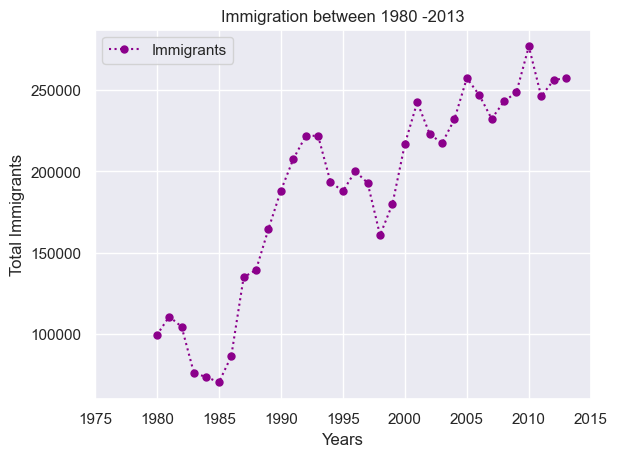

In [10]:
# create figure and axes
fig, ax = plt.subplots()

# plot the line
ax.plot(total_immigrants, 
        color ='darkmagenta',
        marker ='o', # Including markers in round shapes
        markersize =5, # Setting the size of the marker
        linestyle = 'dotted') # Setting the line style to a Dotted line

ax.set_title('Immigration between 1980 -2013')
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')
ax.legend(['Immigrants'])

plt.xlim(1975, 2015)
plt.show()


### Case Study

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

**Let's Plot a line graph of immigration from Haiti**

1. We require to create a dataframe where the name of the 'Country' is equal to 'Haiti' and years from 1980 - 2013.<br> 
2. We will be required to transpose the new dataframe in to a series for plotting.<br> 
3. Then we have to change the type of index of the series to integer for a better look of the plot.<br> 
4. Then create fig and ax and call function plot() on the data.


In [11]:
df.reset_index(inplace =True) # it will replace the country as an index

#creating haiti df with only years columns 1980 - 2013
df_haiti = df[df['Country'] =='Haiti']
df_haiti.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
75,Haiti,Latin America and the Caribbean,Caribbean,Developing regions,1666,3692,3498,2860,1418,1321,...,1682,1619,1598,2491,2080,4744,6503,5868,4152,84813


In [12]:
# lets transpose to get the result as a series
df_haiti = df_haiti[years].T
#convert the index to typre integer for plotting
df_haiti.index = df_haiti.index.map(int)
df_haiti.head()

,75
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


Let's plot the line plot on Haiti data.

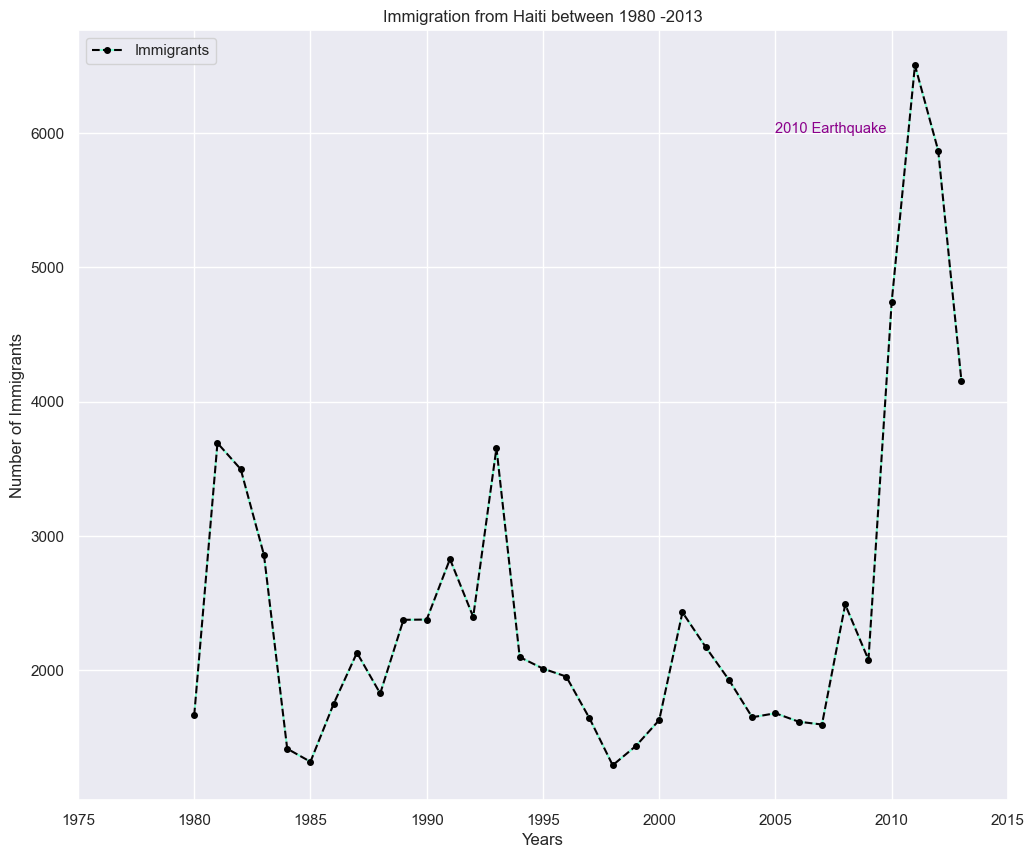

In [13]:
fig, ax =plt.subplots(figsize =(12,10))

ax.plot(df_haiti,
        color ='black',
        marker ='o',
        gapcolor = 'aquamarine',
        markersize =4,
        linestyle ='dashed')

ax.set_title("Immigration from Haiti between 1980 -2013")
ax.set_xlabel("Years")
ax.set_ylabel("Number of Immigrants")

#annotate the rise in immigration due to 2010 earthquake.
ax.annotate('2010 Earthquake', color ='darkmagenta', xy =(2005, 6000), fontsize =10.5)

plt.xlim(1975, 2015)
plt.legend(['Immigrants'], loc= 'upper left' )
plt.show()


 We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti.

## Bar Plot

A bar plot represents `categorical data` with rectangular bars, where the height of each bar corresponds to the value of a specific category, making it suitable for comparing values across different categories.<br><br> **Let's create a bar plot to visualize the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013.** 

In [14]:
df.sort_values(by =['Total'], ascending =False, axis =0, inplace =True)
df_top5 = df.head()
df_top5 = df_top5.reset_index()

#create a list of names of top 5 countries
label = list(df_top5.Country)
label

['India',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan']

Change the name of United Kindom to Uk for plotting.

In [15]:
label[2] = 'UK'
label

['India', 'China', 'UK', 'Philippines', 'Pakistan']

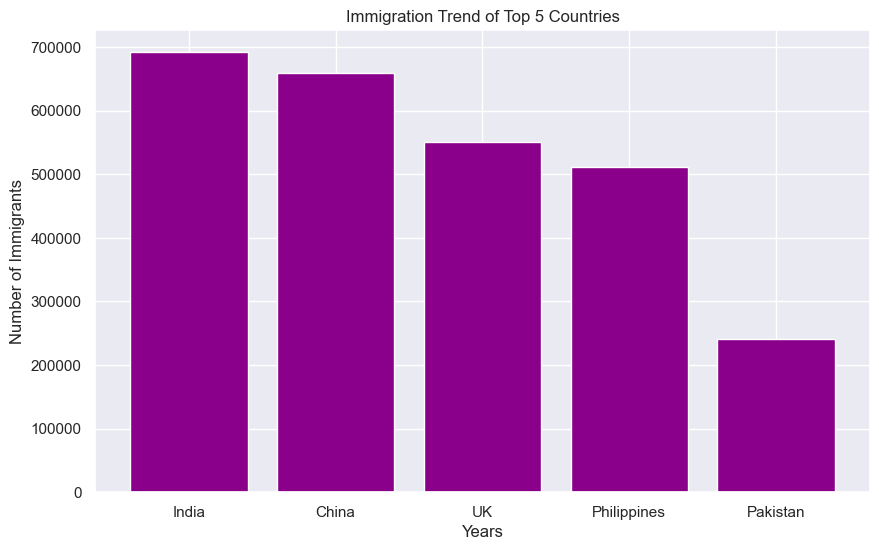

In [16]:
fig, ax = plt.subplots(figsize =(10,6))

ax.bar(label, df_top5['Total'], label =label, color ='darkmagenta')
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()



**Now let's create a bar plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013.**

In [17]:
df.sort_values(by =['Total'],ascending=False, axis =0, inplace =True)
df_last5 = df.tail()
df_last5 =df_last5.reset_index()
df_last5

,index,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,149,San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
1,123,New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
2,109,Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
3,191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
4,131,Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [18]:
labels = list(df_last5.Country)

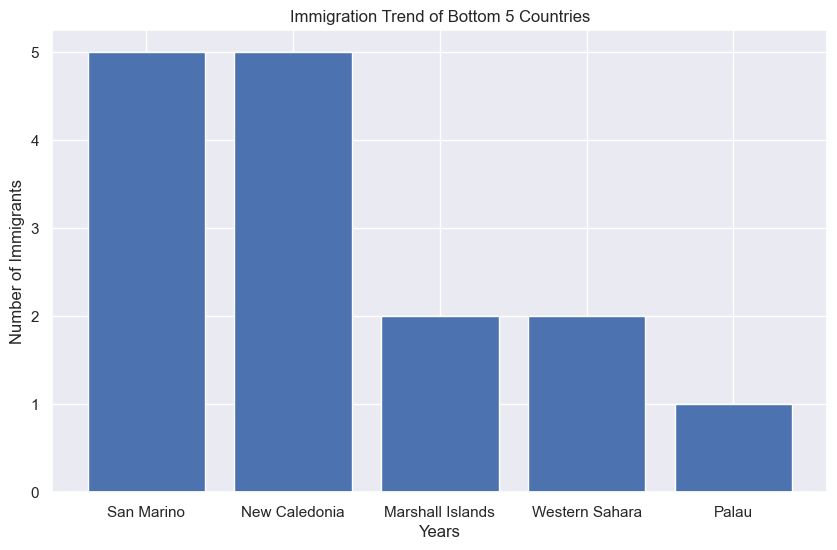

In [19]:
fig, ax = plt.subplots(figsize =(10,6))

ax.bar(labels, df_last5['Total'], label =labels)
ax.set_title('Immigration Trend of Bottom 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

## Histogram

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.
<br><br>Let's find out the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?<br>


In [20]:
df_country = df.groupby(['Country'])['2013'].sum().reset_index()
df_country.head()

,Country,2013
0,Afghanistan,2004
1,Albania,603
2,Algeria,4331
3,American Samoa,0
4,Andorra,1


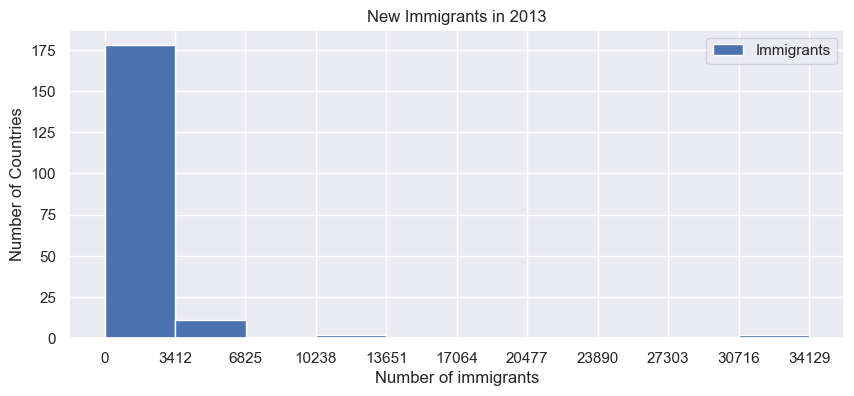

In [21]:
fig, ax = plt.subplots(figsize =(10,4))

count = ax.hist(df_country['2013'])
ax.set_title("New Immigrants in 2013")
ax.set_xlabel("Number of immigrants")
ax.set_ylabel("Number of Countries")
ax.set_xticks(list(map(int, count[1])))
plt.legend(['Immigrants'])

plt.show()


#### We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

`What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?`


In [22]:
df2 =df.groupby(['Country'])[years].sum()
df_dns = df2.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns = df_dns.T
df_dns.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


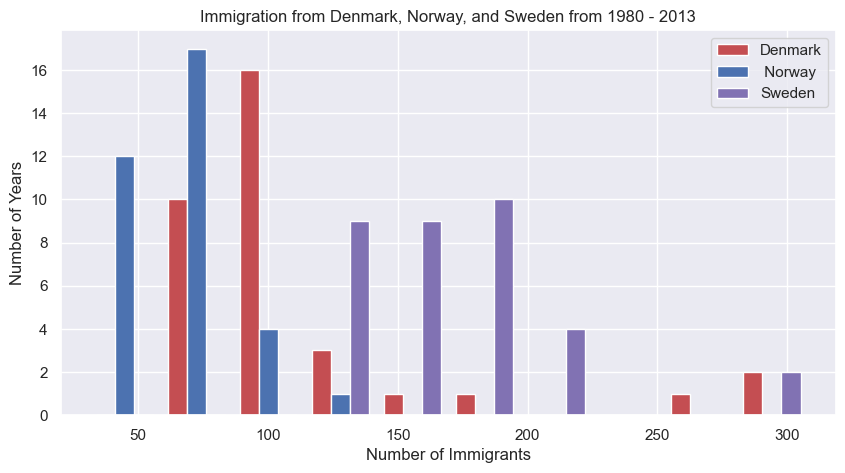

In [23]:
fig, ax =plt.subplots(figsize =(10,5))

ax.hist(df_dns, color =['r', 'b','m'])
ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(["Denmark" ," Norway", "Sweden"])

plt.show()

`Now lets find out the immigration distribution for China and India for years 2000 to 2013?`

In [24]:
df1 = df.groupby(['Country'])[years].sum()
y = list(map(str, range(2010, 2014)))

df_ci = df1.loc[['India', 'China'], y]
df_ci = df_ci.T
df_ci

Country,India,China
2010,34235,30391
2011,27509,28502
2012,30933,33024
2013,33087,34129


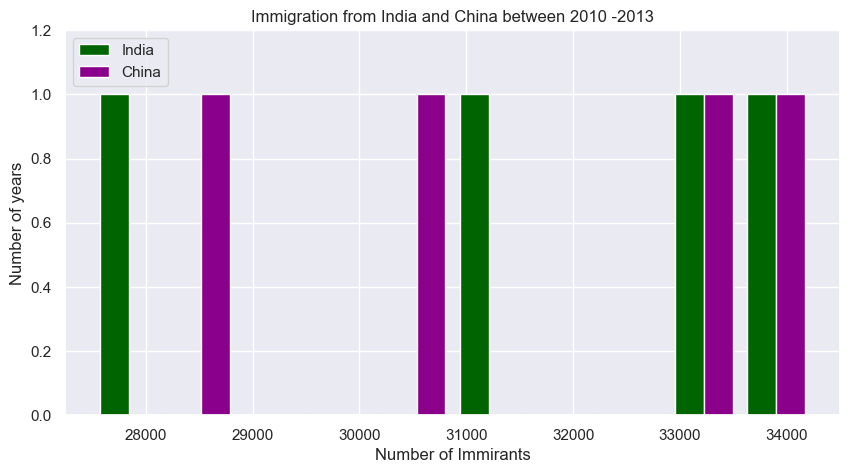

In [25]:
fig ,ax = plt.subplots(figsize =(10,5))

ax.hist(df_ci, color =['darkgreen', 'darkmagenta'])
ax.set_title("Immigration from India and China between 2010 -2013")
ax.set_xlabel("Number of Immirants")
ax.set_ylabel("Number of years")
ax.legend(['India', 'China'], loc= ('upper left'))

plt.ylim(0,1.2)
plt.show()

## Pie Chart<a id="14"></a>

A pie chart represents the proportion or percentage distribution of different categories in a dataset using sectors of a circular pie.
<br> Let's create a pie chart representing the 'Total Immigrants' for the year 1980 to 1985

In [26]:
# Let's recall total_immigrants to check what we are going to plot
total_immigrants.head() 

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
dtype: int64

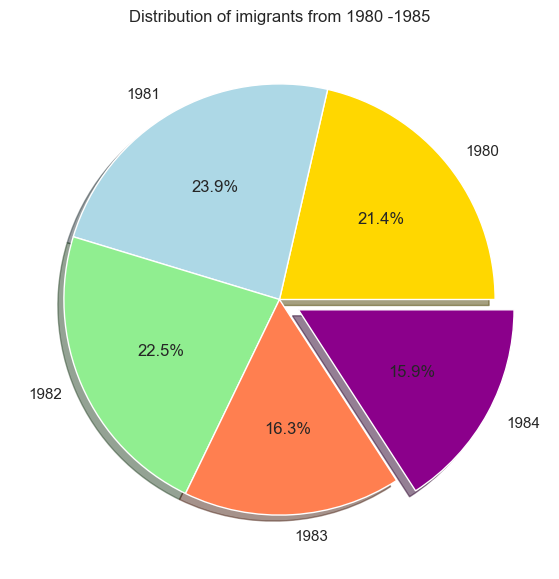

In [27]:
fig, ax = plt.subplots(figsize =(10,7))

ax.pie(total_immigrants[0:5], labels =years[0:5],
       colors = ['gold','lightblue','lightgreen','coral','darkmagenta'],
       autopct = '%1.1f%%',
       explode = [0,0,0,0,0.1],
       shadow =True)

ax.set_aspect('equal')
ax.set_title('Distribution of imigrants from 1980 -1985')
plt.show()

Let's create a pie chart representing the total immigrants proportion for each continent.

First, you will have to group the data over continents and get the sum on total. Then you can pass this data to the pie function

In [28]:
df_con = df.groupby('Continent')['Total'].sum().reset_index()
df_con


,Continent,Total
0,Africa,618948
1,Asia,3317794
2,Europe,1410947
3,Latin America and the Caribbean,765148
4,Northern America,241142
5,Oceania,55174


To fit the names of the continents in the pie chart we need to rename the Latin America and Caribbean and Northern America.

In [29]:
label = list(df_con.Continent)
label[3] = 'LAC' #short for Latin America and Caribbian
label[4] = 'NA' # For Northern America, so that it can fit in the pie chart
label

['Africa', 'Asia', 'Europe', 'LAC', 'NA', 'Oceania']

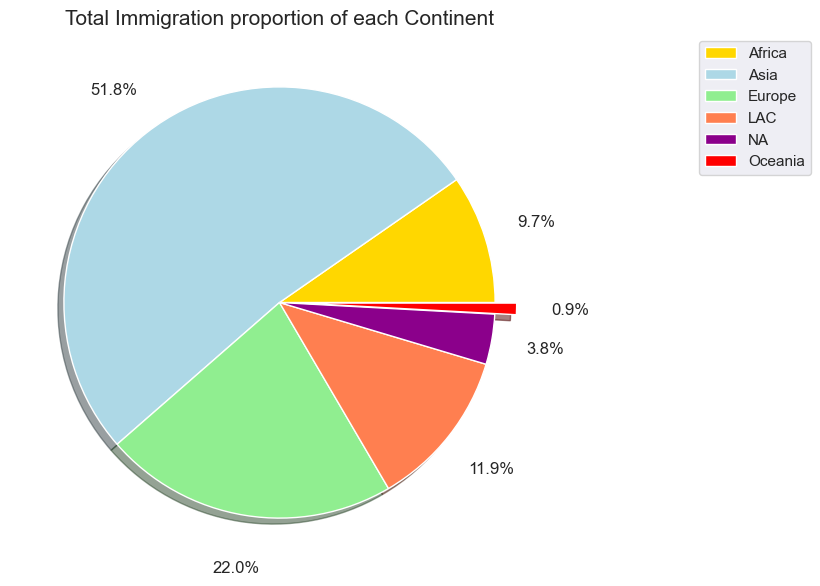

In [30]:
fig, ax = plt.subplots(figsize = (10,7))

ax.pie(df_con['Total'], 
       colors = ['gold','lightblue','lightgreen','coral','darkmagenta', 'red'],
       autopct = "%1.1f%%",
       pctdistance = 1.25,
       explode = [0,0,0,0,0,0.1],
       shadow =True)

ax.set_aspect('equal')
ax.legend(label, bbox_to_anchor = (1,0,0.5,1))
ax.set_title("Total Immigration proportion of each Continent", fontsize =15)

plt.show()

`bbox_to_anchor`=(1, 0, 0.5, 1): This argument specifies the position of the legend box relative to the axes. The values are a tuple of four numbers representing the x and y coordinates of the lower left corner of the legend box and the width and height of the box.

(1, 0): This indicates that the lower left corner of the legend box is positioned at the upper right corner of the axes (since x=1 and y=0).<br>
(0.5, 1): This indicates that the width of the legend box is half the width of the axes and the height of the legend box is the same as the height of the axes.

## Sub-plotting

Let us explore how to display more than one plot on the same figure and specify the number of rows and columns to be created to the subplots function.  

For instance, let’s create a line and scatter plot in one row <br>
plt.subplots().

`sharey=True:` This crucial argument specifies that both subplots should share the same y-axis. This means that the y-axis scale and tick marks will be consistent across both plots.

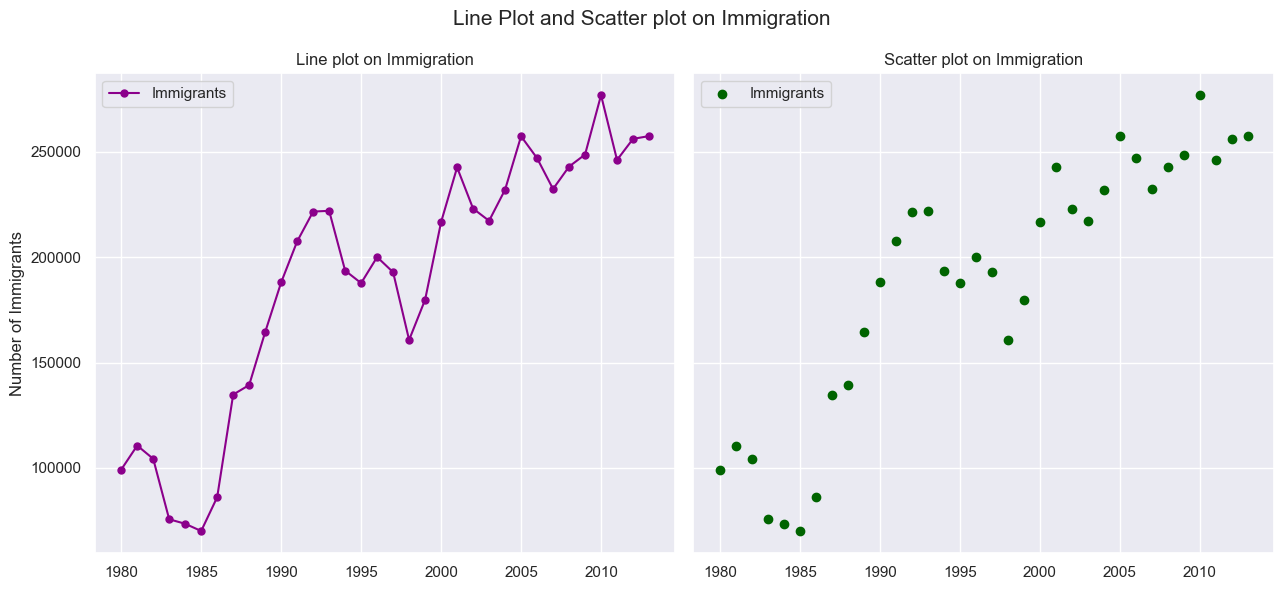

In [31]:
fig, axs = plt.subplots(1,2, sharey =True, figsize =(13,6))

# plotting the first axes: the left one

axs[0].plot(total_immigrants, color= 'darkmagenta', 
            marker = 'o', markersize =5)
axs[0].set_title("Line plot on Immigration")
axs[0].legend(['Immigrants'])

# plotting the second axes: the right one

axs[1].scatter(total_immigrants.index, total_immigrants, color ='darkgreen')
axs[1].set_title("Scatter plot on Immigration")
axs[1].legend(['Immigrants'])

axs[0].set_ylabel("Number of Immigrants")

#Adding a Title for the Overall Figure
fig.suptitle("Line Plot and Scatter plot on Immigration", fontsize = 15)

# Adjust spacing between subplots
fig.tight_layout()

plt.show()

We can also implement the subplotting with **add_subplot()** as below:-


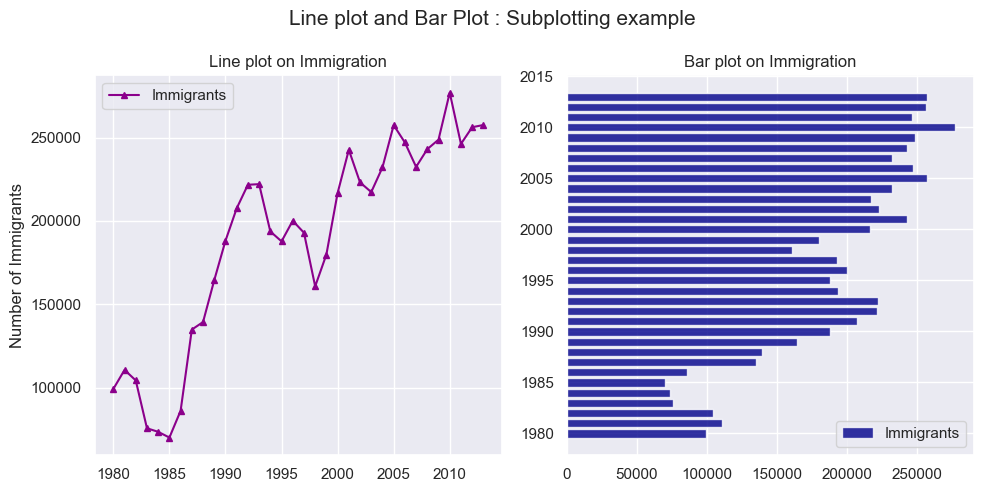

In [32]:
fig = plt.figure(figsize=(10,5))

# Add the first subplot (top-left)
axs1  =fig.add_subplot(1,2,1)

# plotting the first axes : first subplot
axs1.plot(total_immigrants, color= 'darkmagenta', 
            marker = '^', markersize =5)
axs1.set_title("Line plot on Immigration")
axs1.legend(['Immigrants'])
axs1.set_ylabel("Number of Immigrants")

# Add the second subplot (top-right)
axs2 = fig.add_subplot(1,2,2)

axs2.barh(total_immigrants.index, total_immigrants, color ='darkblue', alpha =0.8)
axs2.set_title("Bar plot on Immigration")
axs2.legend(['Immigrants'])

#Adding a Title for the Overall Figure
fig.suptitle("Line plot and Bar Plot : Subplotting example", fontsize =15)
fig.tight_layout()

plt.show()


### Let's create four subplots in 2 x 2 display.

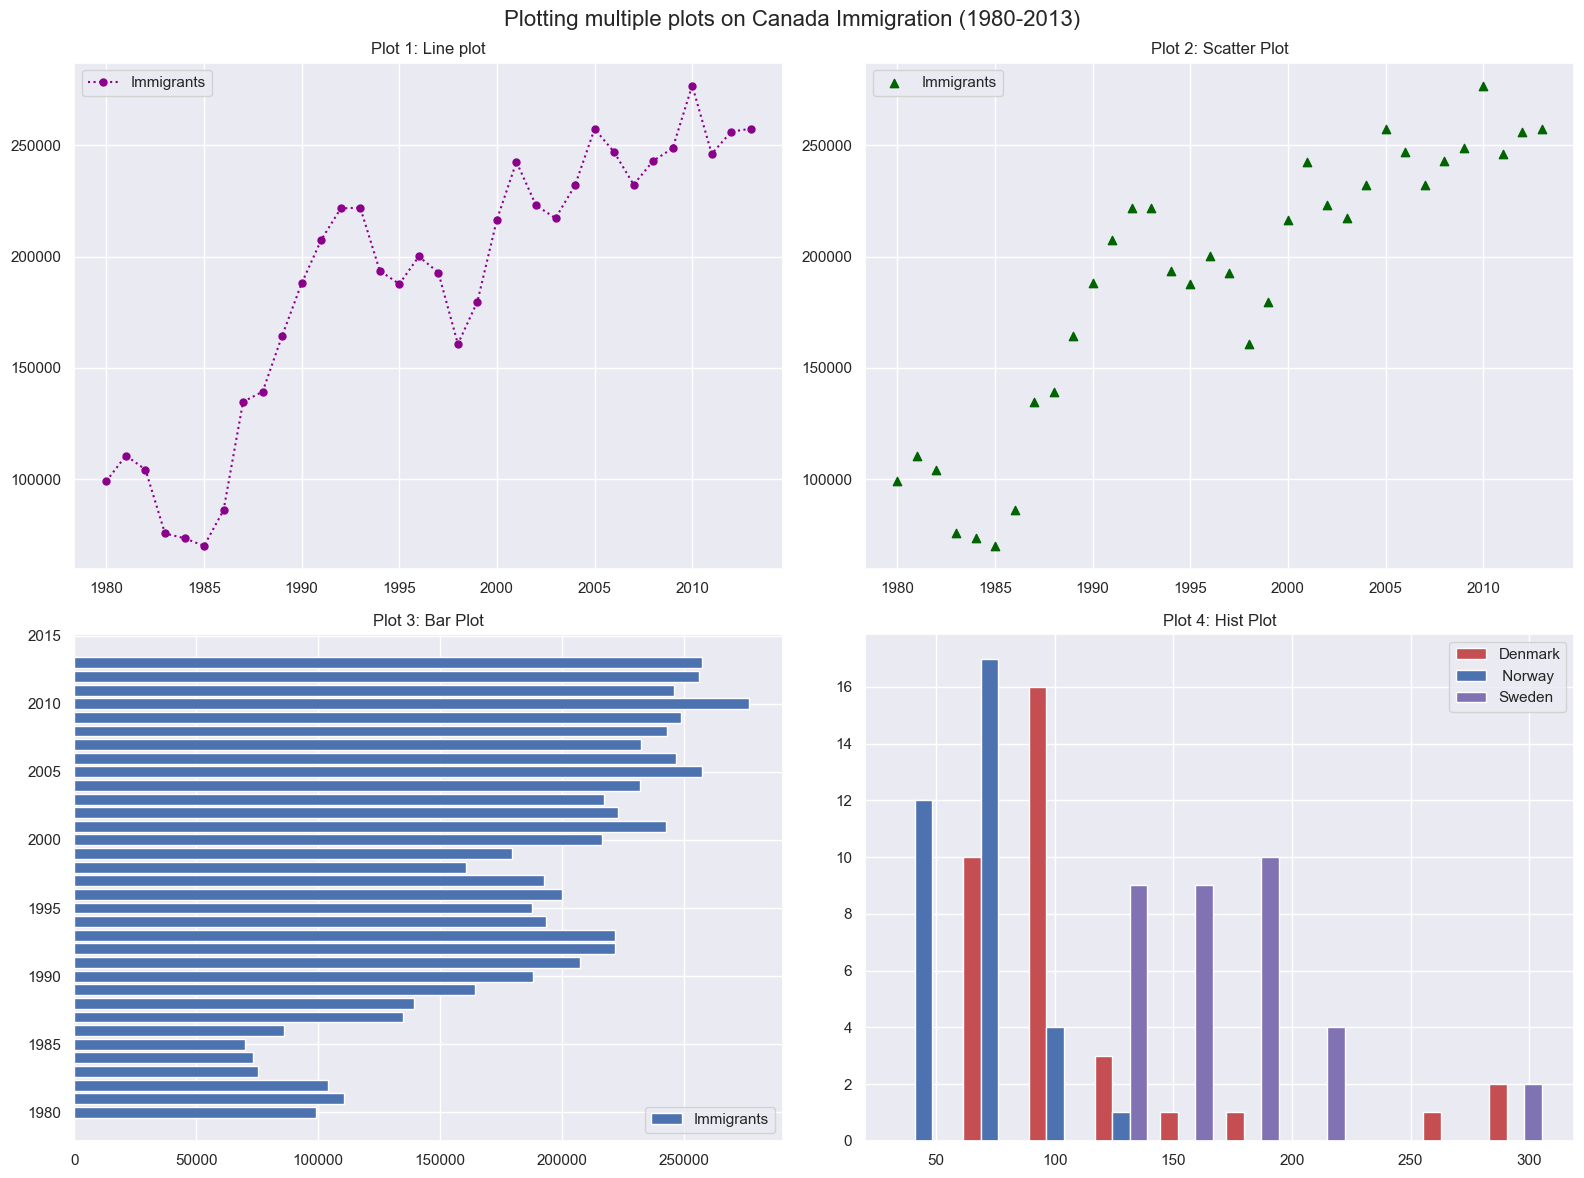

In [33]:
fig = plt.figure(figsize=(16,12))

# Adding first subplot : Top left
ax1 = fig.add_subplot(2,2,1)
ax1.plot(total_immigrants, color ='darkmagenta',
         linestyle = 'dotted',
         marker = 'o', markersize =5)
ax1.legend(['Immigrants'])
ax1.set_title("Plot 1: Line plot")

# Adding second subplot : top right
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(total_immigrants.index, total_immigrants,
            color ='darkgreen', marker ='^')
ax2.legend(['Immigrants'])
ax2.set_title("Plot 2: Scatter Plot")

# Adding third subplot : bottom left
ax3 = fig.add_subplot(2,2,3)
ax3.barh(total_immigrants.index, total_immigrants)
ax3.legend(['Immigrants'])
ax3.set_title("Plot 3: Bar Plot")

# Adding forth subplot : bottom right
ax4 = fig.add_subplot(2,2,4)
ax4.hist(df_dns, color =['r', 'b', 'm'])
ax4.set_title("Plot 4: Hist Plot")
ax4.legend(["Denmark" ," Norway", "Sweden"])

fig.suptitle("Plotting multiple plots on Canada Immigration (1980-2013)", fontsize =16)
fig.tight_layout()

plt.show()

### <h3 align="center"> Data Visualization by Lovish Garlani | IBM Module <h3/>